# Homework 8

## FINM 35700 - Spring 2025

### UChicago Financial Mathematics

### Due Date: 2025-05-20

* Alex Popovici
* alex.popovici@uchicago.edu

In [1]:
# import tools from previous homeworks
from credit_market_tools import *

# Use static calculation/valuation date of 2024-12-13, matching data available in the market prices EOD file
calc_date = ql.Date(13, 12, 2024)
ql.Settings.instance().evaluationDate = calc_date

# Calculation/valuation date as pd datetime
as_of_date = pd.to_datetime('2024-12-13')

-----------------------------------------------------------
# Problem 1: Options Pricing and Volatility Smiles in the Merton Structural Credit Model
## Follow Lecture 7, "Structural Credit Default Models"

We assume the following input values in the Merton Structural Credit Model
- Initial Assets of 1 (e.g. think about 1 $BN in assets at time 0)
- Face value of Liabilities K: 0.9 (e.g. initial leverage of 90%)
- Bond maturity T = 5 years
- Asset volatility at 20% (log-normal annualized vol)
- Flat risk-free interest rates of 4%
- Log-normal distribution of assets at time T, using Lecture 7 Formula (27):

$A_{T}=A_{0}\cdot\exp\left[\left(r-\frac{1}{2}\sigma_{A}^{2}\right)\cdot T+\sigma_{A}\cdot W_{T}\right]$


## a. Distributions of Assets and Equity fair values at time t = 1 year


Use the following discretization grid for Asset at time t: [a from 0.02 to 2 in steps of 0.02].

Compute the density (PDF) and cumulative density (CDF) of Assets at time t.

For each value of the assets, compute the fair value of Equity at time t.

Plot the results: Assets PDF, Assest CDF and Equity fair value at time t.

You can use lognorm from scipy.stats for the log-normal distribution PDF/CFD.

## b. Compute the value of an Europen ATM (At-The-Money) Call option with maturity t = 1 year.

For ATM options, the strike k equals the equity value at time 0, i.e. $k = E_0$.

The Call Option value can be obtained by numerical integration of the call payoff function against the log-normal density of A_t, as derived in Lecture 7 formula (47).

You can use quad from scipy.integrate for numerical integration.

$EquityCall\left(E_{0},k,t\right)=e^{-r\cdot t}\cdot\mathbb{E}\left[\left(E_{t}-k\right)^{+}|\mathcal{F}_{0}\right]$

$=e^{-r\cdot t}\cdot\mathbb{E}\left[\left(Call\left(A_{t},K,T-t,\sigma_{A},r,\right)-k\right)^{+}|\mathcal{F}_{0}\right]$

$=\int_{-\infty}^{\infty}e^{-r\cdot t}\cdot\left(Call\left(x,K,T-t,\sigma_{A},r,\right)-k\right)^{+} \cdot \phi_{A_{t}} \, dx$

## c. Compute the Implied Volatility of the ATM European Call Option

Implement a function to compute the Implied Volatility in the Black-Scholes model (using European Call option price as input)

Compute the Implied Volatility of the ATM European Call Option.

Use a numerical root finder, e.g. root_scalar from scipy.optimize.

## d. Plot the option Implied Volatility Smile in the Merton model

Use a grid of strikes [k from 80% to 120% in steps of 5%], relative to the spot equity price E_0.

Compute the European Call options prices and the corresponding option Implied Volatilities on the above grid.
Plot the Implied Volatility smile (Implied Volatities by strikes).

-----------------------------------------------------------
# Problem 2: Pricing Convertible Bonds in the Merton Structural Credit Model
## Follow Lecture 7, "Structural Credit Default Models"

A convertible bond is a type of corporate bond that can be converted into a predetermined number of the issuing company’s common stock ("conversion ratio") at the bondholder’s discretion, typically at specific dates. The conversion to equity is optional, so bondholders can choose to hold the bond to maturity for interest and principal repayment instead.

Benefits for convertible bond investors:
- Income from interest payments.
- Potential capital gains if the stock price increases and conversion is profitable.
- Lower risk than owning stock directly, as bondholders are prioritized over shareholders in case of bankruptcy.

Benefits for convertible bond issuers:
- Lower interest rates than regular bonds due to the conversion feature’s appeal.
- Potential to reduce debt if bonds are converted to equity.


The Merton structural credit model (1974) provides a framework for pricing convertible bonds by treating them as hybrid instruments with both debt and equity characteristics.

### Recap of model assumptions

- Constant interest rates r

- Constant asset volatility $\sigma_{A}$

- Asset value process $A_{t}$ follows a geometric Brownian motion with drift r under risk neutral measure $\mathbb{P}$

- Liabilities consist of one zero-coupon convertible bond with face value K and maturity T

- Conversion details: at time T, the convertible bond can be converted to equity at a conversion ratio of $C \in (0,1)$ relative to the assets $A_{T}$ (i.e. for a convertible bond payout of $C \cdot A_{T}$ at time T, in case of conversion)

- Credit default triggered if value of assets $A_{T}$ is below liabilities K at maturity T.


## a. Compute the fair value of the Convertible Bond

Derive the formula for the Convertible Bond payout at time T and compute the fair value $CB_0$ of the convertible bond at time 0.

You can use the formulas for the fair value of the "vanilla" corporate bond $B_0$ (without callability) at time 0, derived in Lecture 7.

For which values of $A_T$ is it economical for the convertible bond holder to exercise the call option?

## b. Compute the fair value of (Convertible) Equity

Derive the formula for the (Convertible) Equity Investor payout at time T: take into acount that the equity investor gets dilluted if the convertible bond is exercised.

Compute the fair value $CE_0$ of equity at time 0. 

You can use the formulas for the fair value of "vanilla" equity $E_0$ (without callability) at time 0, derived in Lecture 7.

## c. Numerical results

Under the following assumptions (matching Homework 7 Problem 1):
- Assets of $125 MM,
- Asset volatility at 20% (log-normal annualized vol)
- Flat risk-free interest rates of 4%
- Convertible Bond face value of $100 MM
- Convertible Bond maturity at T = 5 years
- Convertible Bond "conversion ratio" of 40% of Assets (at time T)


Compute the:
1. fair value of the (risky) convertible bond $CB_0$ at time 0,
2. fair value of the (convertible) equity $CE_0$ at time 0,
3. fair value of the conversion call option at time 0,
4. Convertible Bond Yield
5. Convertible Bond Credit Spread

and compare with the "vanilla" versions, when the bond is not callable (Homework 7 Problem 1).

## d. Plot various Convertible Equity + Bond metrics

Plot the Fair Value of
- Vanilla Equity,
- Convertible Equity,


Plot the Fair Value of
- Vanilla Bond
- Convertible Bond


Plot the following yields:
- Vanilla Bond Yields to maturity
- Convertible Bond Yields to maturity

on a grid of initial Asset values, from $50 MM to $200 MM in steps of $5 MM.


-----------------------------------------------------------
# Problem 3: Correlated defaults: homogeneous issuers case
## Follow Lecture 7, "Correlated Defaults"
We are analyzing a pool consisting of n = 100 equally weighted credit issuers with $100 total face notional. Our investment time horizon is T = 5 years.

The pool is homogenous, and each issuer has:
1. a flat hazard rate h = 12%,
2. a constant recovery rate given default of R of 40% and
3. a correlation $\rho$ to the systematic (market) factor.

## a. Expected pool loss to time T

Compute the expected loss in the pool until time T.

## b. Counting the number of issuer defaults until time T

Write a function that computes the probability of exactly k defaults until time T. 

Use Lecture 7 Section "Correlated defaults" as a reference. 
For the numerical integration, you can use and quad from scipy.integrate (or similar).

$\mathbb{P}\left[L_{T}=k\cdot\frac{\left(1-R\right)}{n}\right]=\mathbb{P}\left[\sum_{i=1}^{n}\mathbb{I}_{\{\tau_{i}\leq T\}}=k\right]=\mathbb{\int_{-\infty}^{\infty}}{n \choose k}\cdot\left(1-p_{x}\right)^{k}\cdot p_{x}^{n-k}\cdot\varphi\left(x\right)dx$

$p_{x}^{i}=\mathbb{P}\left[Z^{i}<\frac{d_{-}^{i}-\rho_{i}\cdot x}{\sqrt{1-\rho_{i}^{2}}}\right]=\Phi\left(\frac{d_{-}^{i}-\rho_{i}\cdot x}{\sqrt{1-\rho_{i}^{2}}}\right)$

$p^{i}=\Phi\left(d_{-}^{i}\right), \forall i = 1..n$

## c. Compute the distribution of number of defaults

Generate and plot the distribution and cumulative distribution of number of defaults.

Use a $\rho$ grid: [rho from 0% to 90% in steps of 10%] for plotting (10 lines total).

Comment on the results.

## d. Compute the Mean and Standard Deviation of Pool Losses, for all correlation coefficients $\rho$ in the grid

Calculate, display and plot the Mean and Standard Deviation of pool losses for each $\rho$ in the grid.

Comment on the results.

------------------------------------------------------------------
# Problem 4: Derivation of fixed rate bond PVs and DV01s in `sympy`

Starting from the fair value formula for risky fixed rate bonds in the `flat yield model`, you will derive the formulas for
* Zero coupon bonds (principal payment only, no coupons) and
* "Interest Only" / IO bonds (coupon payments only, no principal payment)

Assume T+0 settlement and zero accrued.

### Flat Yield Model Parameters
* bond face value of 100%
* bond maturity T (in years),
* semi-annual coupon c,
* flat yield y

According to formula [5] in Lecture 1, the bond present value is given by:

\begin{align}
BondPV=B(0,T,c,y)
\end{align}

\begin{align}
=\sum_{k=1}^{2T}\frac{c}{2}\cdot e^{-k\cdot\frac{y}{2}}+e^{-T\cdot y}
\end{align}

\begin{align}
= 1+\frac{\frac{c}{2}-\left( e^{\frac{y}{2}}-1 \right)}{e^{\frac{y}{2}}-1 } \cdot \left(1-e^{-T\cdot y}\right)
\end{align}


The example code below explains how to implement the present value function for the generic fixed rate bond.

It uses the 'sympy' library (symbolic mathematics) to translate mathematical formulas into a sympy symbolic equation, as described in the solution to Homework 3, Problem 2.

The sympy symbolic equation is converted into a Python function via sympy.lambdify.

The function `plot_bond_function_surface(bond_func, 'Plot Title')` plots the Python bond function on a "yield x maturity" 2D discretization grid:

* in yield space: [y from 0% to 10% in steps of 0.5%] and 
* in time-to-maturity space: [T from 1Y to 20Y in steps of 1Y].

We assume a bond coupon c of 5% for plotting purposes.

Analytic formula for bond_pv: (1 - exp(-T*y))*(c/2 - exp(y/2) + 1)/(exp(y/2) - 1) + 1


(1 - exp(-T*y))*(c/2 - exp(y/2) + 1)/(exp(y/2) - 1) + 1

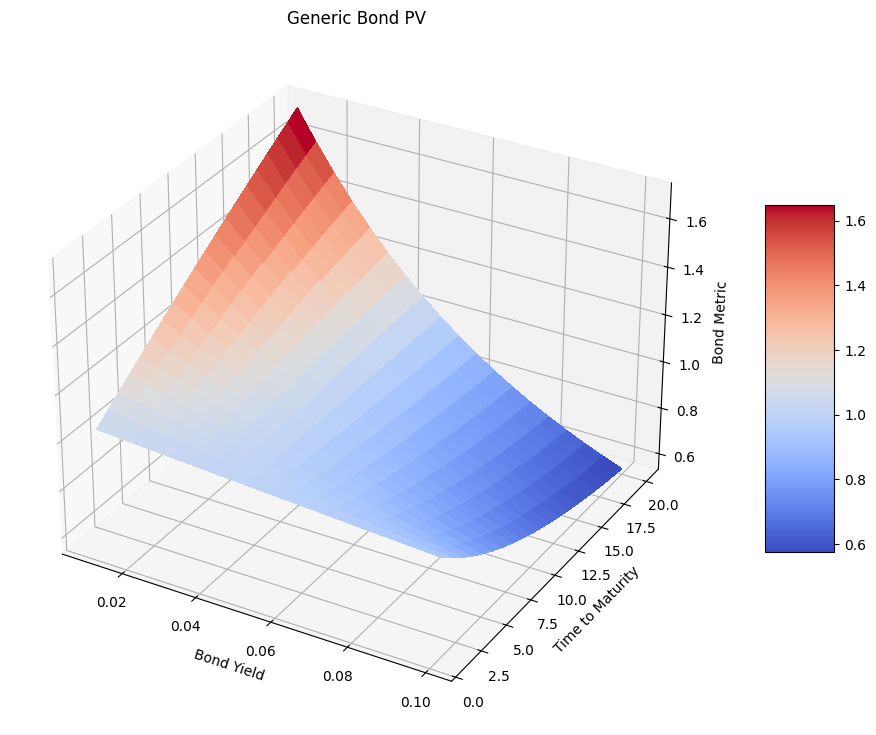

In [16]:
# define symbolic variables
t = sp.symbols('T')
c = sp.symbols('c')
y = sp.symbols('y')

# define symbolic equation for bond pv
bond_pv_eq =  1 + (c/2 -(sp.exp(y/2) - 1)) / (sp.exp(y/2) - 1) * (1 - sp.exp(-t*y))
print('Analytic formula for bond_pv:', bond_pv_eq)
display(bond_pv_eq)

# create function(y,T,y) from equation
bond_pv_func = sp.lambdify([c,t,y], bond_pv_eq)

# Plot the surface
plot_bond_function_surface(bond_pv_func, 'Generic Bond PV')


## a. Derive and plot the DV01 of a Fixed rate bond

Use the sympy "diff()" function to compute & display the derivative of the fixed rate bond PV with respect to the bond yield.

Plot the bond DV01 surface on the "yield x maturity" 2D discretization grid.


## b. Derive and plot the present value functions for a Zero Coupon bond.

Derive and display the analytic formula for a Zero Coupon bond PV.

Plot the Zero Coupon bond PV surface on the "yield x maturity" 2D discretization grid.

## c. Derive and plot the DV01 of a Zero Coupon bond.

Use the sympy "diff()" function to compute & display the derivative of the Zero Coupon bond PV with respect to the bond yield.

Plot the Zero Coupon bond DV01 surface on the "yield x maturity" 2D discretization grid.


## d. Derive and plot the present value function for an Interest Only bond.

Derive and display the analytic formula for an Interest Only bond PV.

Plot the Interest Only bond PV surface on the "yield x maturity" 2D discretization grid.

Keep in mind that any generic fixed rate bond can be decomposed into Zero Coupon and Interest Only components.

## e. Derive and plot the DV01 of an Interest Only bond.

Use the sympy "diff()" function to compute and display the derivative of the Interest Only bond PV.

Plot the Interest Only bond DV01 surface on the "yield x maturity" 2D discretization grid.


## f. For which bond coupon $c^*$ are the Interest Only PV and the Zero Coupon PV equal?
 
### Find the bond coupon $c^*$ satisfying:

\begin{align}
InterestOnlyPV(c^*, y,T) = ZeroCouponPV(y,T)
\end{align}

Display the formula for $c^*$.